In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np


# Loading data

In [2]:
train = pd.read_csv('datasets/com_concept_drift/sdn_train_unormalized.csv')
test = pd.read_csv('datasets/com_concept_drift/sdn_test_unormalized.csv')

In [28]:
train[train.delay>0]

,seconds,temperature,label,delay
timestamp,,,,
2004-03-20 04:35:50,1.079768e+09,-0.198020,1.0,631.0
2004-03-20 04:36:39,1.079768e+09,-0.198020,1.0,631.0
2004-03-20 04:37:03,1.079768e+09,-0.198020,1.0,631.0
2004-03-20 04:37:52,1.079768e+09,-0.188119,1.0,631.0
2004-03-20 04:39:57,1.079768e+09,-0.143564,1.0,631.0
...,...,...,...,...
2004-03-14 09:33:45,1.079268e+09,0.415842,1.0,1441.0
2004-03-14 09:34:14,1.079268e+09,0.425743,1.0,1441.0
2004-03-14 09:34:41,1.079268e+09,0.435644,1.0,1441.0


In [3]:
train.index = train['timestamp']
train.drop('timestamp', axis=1, inplace=True)

test.index = test['timestamp']
test.drop('timestamp', axis=1, inplace=True)

In [4]:
train = train[train.delay>=0]
test = test[test.delay>=0]

train = train[train.delay<=10000] 

test = test[test.delay<=10000]

In [24]:
max(test.delay)

5101.0

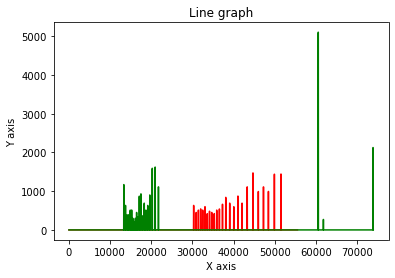

In [5]:
plt.title("Line graph")  
plt.xlabel("X axis")  
plt.ylabel("Y axis")  
plt.plot(np.arange(len(train.delay)), train.delay, color ="red")  
plt.plot(np.arange(len(test.delay)), test.delay, color ="green") 
plt.show()

Text(0.5, 1.0, 'Attribute: delay')

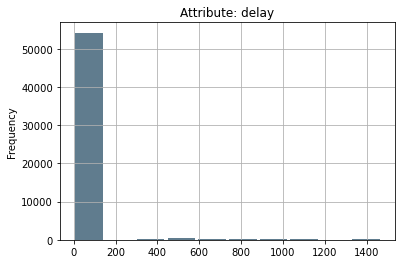

In [6]:
train["delay"].plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title("Attribute: delay")

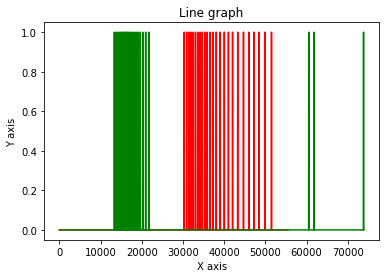

In [7]:
plt.title("Line graph")  
plt.xlabel("X axis")  
plt.ylabel("Y axis")  
plt.plot(np.arange(len(train.label)), train.label, color ="red")  
plt.plot(np.arange(len(test.label)), test.label, color ="green") 
plt.show()

# general graphic


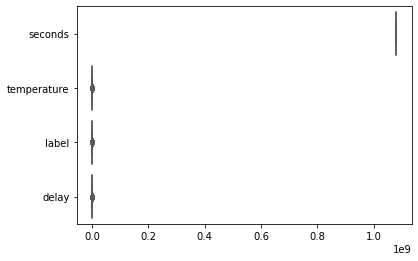

In [8]:
 ax = sns.boxplot(data=train, orient="h", palette="Set2")

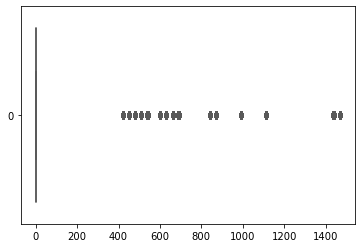

In [9]:
ax = sns.boxplot(data=train['delay'], orient="h", palette="Set2")

# Normalized Graphic 

In [10]:
from sklearn.preprocessing import StandardScaler

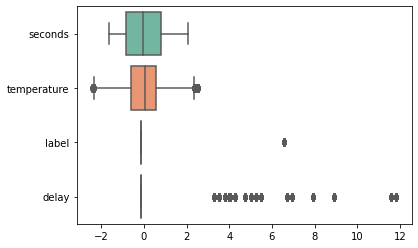

In [11]:
scaler = StandardScaler().fit(train)
norm_subset = pd.DataFrame(scaler.transform(train), columns = train.columns)
ax = sns.boxplot(data=norm_subset, orient="h", palette="Set2")

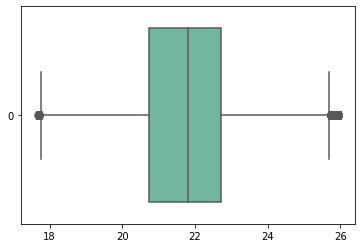

In [12]:
ax = sns.boxplot(data=train['temperature'], orient="h", palette="Set2")

Text(0.5, 1.0, 'Attribute: delay')

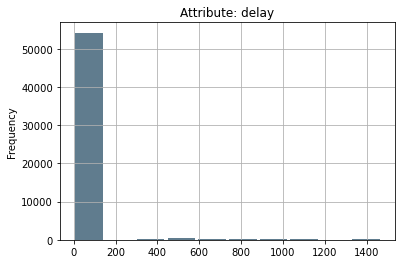

In [13]:
train["delay"].plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title("Attribute: delay")

Text(0.5, 1.0, 'Attribute: delay')

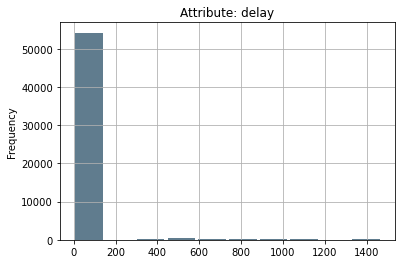

In [14]:
train["delay"].plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title("Attribute: delay")

In [15]:
train.corr()

,seconds,temperature,label,delay
seconds,1.000000,0.294075,-0.069880,-0.026942
temperature,0.294075,1.000000,-0.050446,-0.039492
label,-0.069880,-0.050446,1.000000,0.916704
delay,-0.026942,-0.039492,0.916704,1.000000


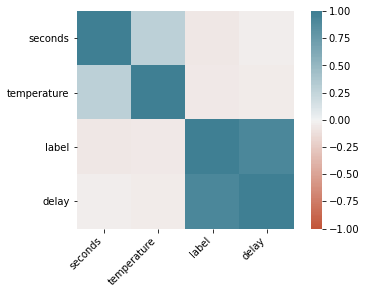

In [16]:
corr = train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

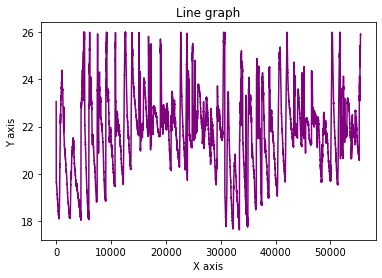

In [17]:
plt.title("Line graph")  
plt.xlabel("X axis")  
plt.ylabel("Y axis")  
plt.plot(np.arange(len(train.temperature)), train.temperature, color ="purple")  
plt.show()

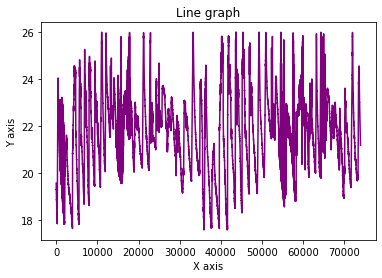

In [18]:
plt.title("Line graph")  
plt.xlabel("X axis")  
plt.ylabel("Y axis")  
plt.plot(np.arange(len(test.temperature)), test.temperature, color ="purple")  
plt.show()

In [19]:
from sklearn.preprocessing import RobustScaler

In [20]:
f_columns = ['delay','temperature']

f_transformer = RobustScaler()
lb_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
train.loc[:,f_columns] = f_transformer.transform(train[f_columns].to_numpy())

lb_transformer = lb_transformer.fit(train[['label']])
train['label'] = lb_transformer.transform(train[['label']])

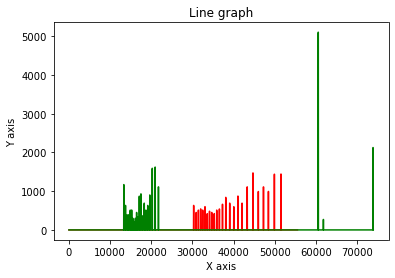

In [21]:
plt.title("Line graph")  
plt.xlabel("X axis")  
plt.ylabel("Y axis")  
plt.plot(np.arange(len(train.delay)), train.delay, color ="red")  
plt.plot(np.arange(len(test.delay)), test.delay, color ="green") 
plt.show()

In [22]:
train[train.label==1]

,seconds,temperature,label,delay
timestamp,,,,
2004-03-20 04:35:50,1.079768e+09,-0.198020,1.0,631.0
2004-03-20 04:36:39,1.079768e+09,-0.198020,1.0,631.0
2004-03-20 04:37:03,1.079768e+09,-0.198020,1.0,631.0
2004-03-20 04:37:52,1.079768e+09,-0.188119,1.0,631.0
2004-03-20 04:39:57,1.079768e+09,-0.143564,1.0,631.0
...,...,...,...,...
2004-03-14 09:33:45,1.079268e+09,0.415842,1.0,1441.0
2004-03-14 09:34:14,1.079268e+09,0.425743,1.0,1441.0
2004-03-14 09:34:41,1.079268e+09,0.435644,1.0,1441.0


In [23]:
np.argsort(train[train.label==1].iloc[:,8])

IndexError: single positional indexer is out-of-bounds

In [ ]:
train[train.label==1].iloc[0,8]